# Contents
- [Dimensionality Reduction](#Dimensionality-Reduction)
- [PCA](#PCA)
- [t-SNE](#t-SNE)
- [UMAP](#UMAP)
- [LDA](#LDA)

___
[Back to the top](#Contents)

# UMAP 

**Uniform Manifold Approximation and Projection** is a powerful non-linear dimensionality reduction technique designed for visualizing and analyzing high-dimensional data. It preserves both local and global structures, making it highly effective for cluster identification and exploratory data analysis.

**Key Features**
- **Preserves Local Structure**: Captures relationships between close data points effectively.
- **Global Structure Awareness**: Retains broader patterns across the dataset.
- **Scalable**: Performs well on large datasets.
- **Flexible**: Can reduce data to 2D, 3D, or higher dimensions.

**Common Parameters**
- **`n_neighbors`**: Determines the size of the local neighborhood for preserving structure. Affects the balance between local and global data patterns.
- **`min_dist`**: Controls how tightly points are packed in the reduced space. Smaller values result in tighter clusters.
- **`n_components`**: Specifies the number of dimensions for the reduced output (e.g., 2 for 2D, 3 for 3D).
- **`random_state`**: Ensures reproducibility of results.

**Applications**
- Data visualization in 2D or 3D.
- Clustering and pattern recognition.
- Preprocessing for machine learning tasks.

UMAP is particularly useful when other techniques like PCA or t-SNE fail to capture complex relationships in the data.


In [ ]:
# !pip install umap-learn
# !pip show umap-learn
# pip install --upgrade pip setuptools
# import umap.umap_ as umap

In [52]:
import umap
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load dataset (example: Iris dataset)
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled


array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

1. **Apply UMAP**:
   - `umap.UMAP`: Initializes the UMAP model with specified parameters:
     - **`n_components=2`**: Reduces the data to 2 dimensions for visualization.
     - **`random_state=42`**: Ensures consistent results across runs.
     - **`n_neighbors=15`**: Sets the number of neighboring points used to compute the local structure of the data. A higher value considers more global structure.
     - **`min_dist=0.1`**: Controls how tightly UMAP places points in the low-dimensional space. Smaller values result in tighter clusters.

   - `fit_transform(X_scaled)`: Fits the UMAP model to the standardized data and transforms it into the reduced 2D space.

2. **Convert UMAP Results to DataFrame**:
   - The transformed data (UMAP results) is stored in a 2D array. This is converted into a pandas DataFrame with columns `UMAP1` and `UMAP2` to represent the two reduced dimensions.

3. **Add Target Column**:
   - A `Target` column is added to associate each point in the UMAP-transformed space with its corresponding class label (`y`).

The resulting DataFrame (`umap_df`) contains the reduced dimensions (`UMAP1`, `UMAP2`) and the original class labels, making it ready for visualization or further analysis.

In [54]:
# Apply UMAP
umap_model = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
X_umap = umap_model.fit_transform(X_scaled)

# Convert UMAP results into a DataFrame
umap_df = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
umap_df['Target'] = y
umap_df

/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


,UMAP1,UMAP2,Target
0,13.374435,0.328165,0
1,10.688055,1.706593,0
2,11.223597,1.161437,0
3,10.938917,1.182683,0
4,13.486146,0.085149,0
...,...,...,...
145,-0.448912,8.424417,2
146,1.178710,5.680158,2
147,0.057903,8.053551,2
148,-0.749855,7.720988,2


#### Understanding the UMAP Visualization

1. **Axes (`UMAP1` and `UMAP2`)**:
   - These are the two dimensions resulting from UMAP's dimensionality reduction.
   - They don't have direct physical interpretation but represent the relationships between points in high-dimensional space.

2. **Clusters**:
   - The three distinct clusters in the plot correspond to the three classes of the Iris dataset:
     - **Setosa** (blue)
     - **Versicolor** (orange)
     - **Virginica** (green)
   - Each cluster represents points that are similar to one another based on their original features.

3. **Class Separability**:
   - The clusters show good separability:
     - **Setosa** is clearly separated from the other two classes.
     - **Versicolor** and **Virginica** overlap slightly, indicating some similarity between them.

4. **Global and Local Structures**:
   - UMAP preserves local neighborhoods (small clusters within each class).
   - It also captures global relationships (e.g., the relative distances between Setosa, Versicolor, and Virginica).

#### **Insights from the Plot**
- **Setosa** is very distinct from the other two classes, as evident from its spatial isolation.
- **Versicolor** and **Virginica** have some overlap, reflecting potential challenges in distinguishing them based on the given features.
- The visualization simplifies high-dimensional relationships, making patterns and separability more interpretable.
- This plot can guide:
   - **Model Evaluation**: Assessing how well the data can be separated by a classification model.
   - **Exploratory Data Analysis**: Identifying clusters, overlaps, or outliers in the data.


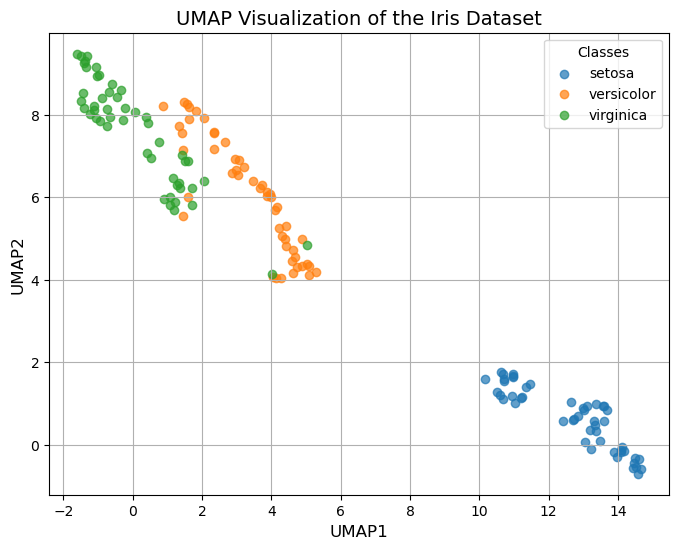

In [55]:
# Plot UMAP results
plt.figure(figsize=(8, 6))
for target in umap_df['Target'].unique():
    subset = umap_df[umap_df['Target'] == target]
    plt.scatter(subset['UMAP1'], subset['UMAP2'], label=data.target_names[target], alpha=0.7)
plt.title('UMAP Visualization of the Iris Dataset', fontsize=14)
plt.xlabel('UMAP1', fontsize=12)
plt.ylabel('UMAP2', fontsize=12)
plt.legend(title="Classes", fontsize=10)
plt.grid()
plt.show()

`Density Plot`
- Purpose: Highlight areas of high or low data density in the UMAP-reduced space.
- Implementation: Use kernel density estimation (KDE).

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


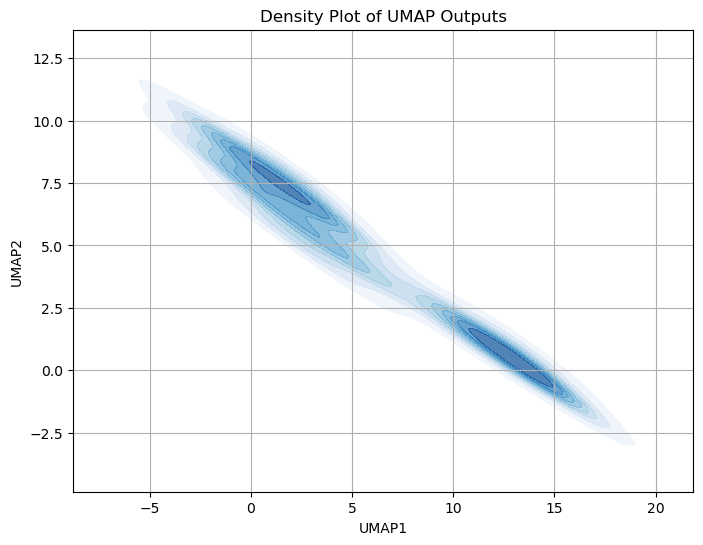

In [56]:
import seaborn as sns

# Density plot of UMAP outputs
plt.figure(figsize=(8, 6))
sns.kdeplot(x=umap_df['UMAP1'], y=umap_df['UMAP2'], fill=True, cmap='Blues', alpha=0.7)
plt.title('Density Plot of UMAP Outputs')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.grid()
plt.show()


`UMAP with Feature Influence`
- Purpose: Show how individual features influence the UMAP projection by coloring points based on a specific feature's value.
- Implementation: Use a color gradient for a feature.

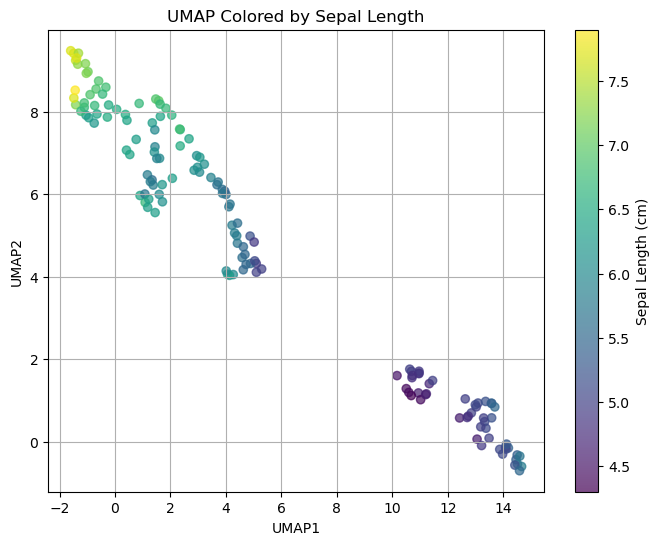

In [68]:
plt.figure(figsize=(8, 6))
plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], c=X.iloc[:, 0], cmap='viridis', alpha=0.7)  # Use iloc for the first column
plt.title('UMAP Colored by Sepal Length')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.colorbar(label='Sepal Length (cm)')
plt.grid()
plt.show()


`3D Visualization`
- Purpose: If you use n_components=3 for UMAP, create a 3D scatter plot to view relationships between clusters in 3D space.
- Implementation: Use libraries like matplotlib or plotly.

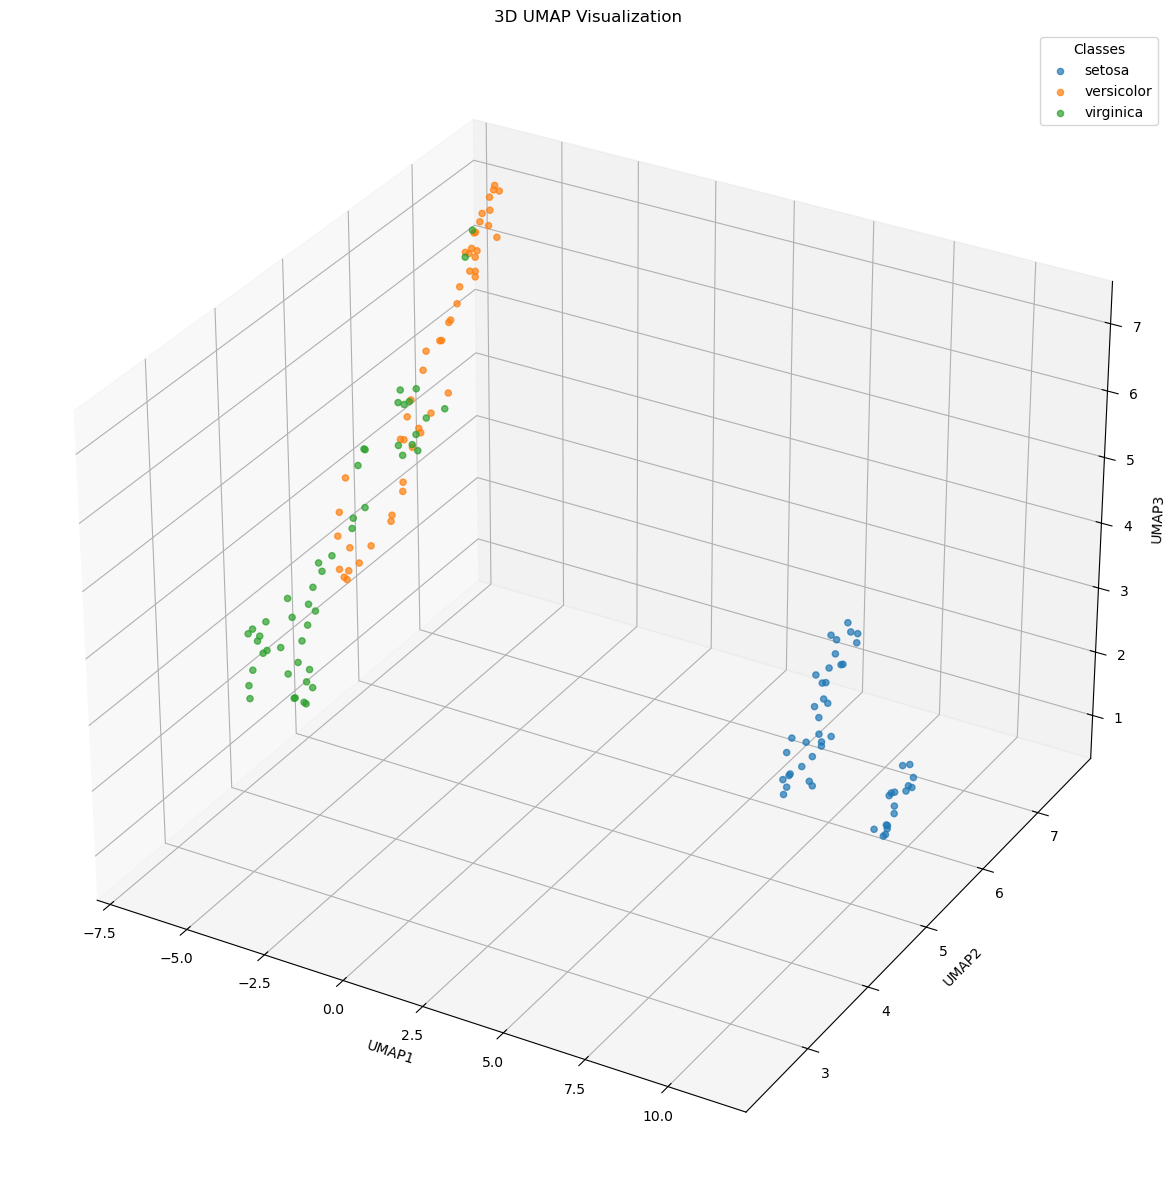

In [66]:
# 3D UMAP scatter plot with z-axis label
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
for target in umap_df_3d['Target'].unique():
    subset = umap_df_3d[umap_df_3d['Target'] == target]
    ax.scatter(subset['UMAP1'], subset['UMAP2'], subset['UMAP3'], label=data.target_names[target], alpha=0.7)
ax.set_title('3D UMAP Visualization')
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')
ax.set_zlabel('UMAP3')
ax.legend(title="Classes")
plt.show()


`UMAP with Clustering`
- Purpose: Use UMAP-reduced data for clustering (e.g., with KMeans or DBSCAN) and visualize the cluster assignments.
- Implementation: Overlay cluster labels on the UMAP scatter plot.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


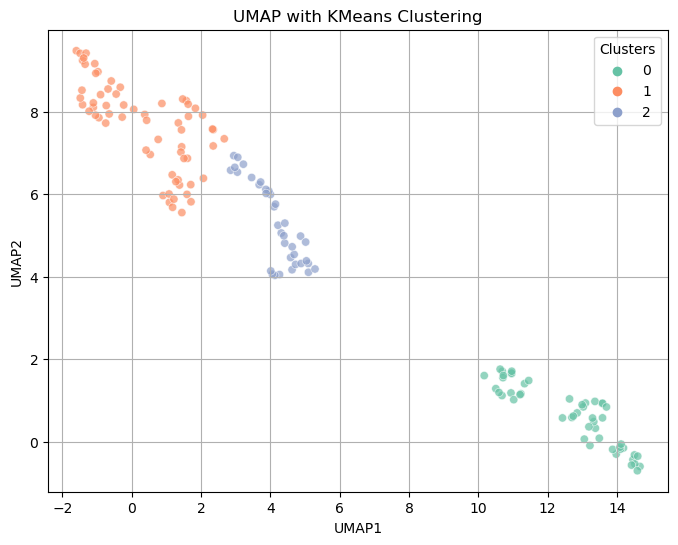

In [59]:
from sklearn.cluster import KMeans

# KMeans clustering on UMAP outputs
kmeans = KMeans(n_clusters=3, random_state=42)
umap_df['Cluster'] = kmeans.fit_predict(umap_df[['UMAP1', 'UMAP2']])

# Scatter plot with cluster labels
plt.figure(figsize=(8, 6))
sns.scatterplot(data=umap_df, x='UMAP1', y='UMAP2', hue='Cluster', palette='Set2', alpha=0.7)
plt.title('UMAP with KMeans Clustering')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend(title="Clusters")
plt.grid()
plt.show()


`Interactive Visualizations`
- Purpose: For more interactive exploration of clusters and features, use plotly or bokeh to create interactive 2D or 3D visualizations.
- Implementation: Add tooltips to inspect point metadata, such as feature values or class labels.

In [60]:
import plotly.express as px

# Interactive UMAP scatter plot
fig = px.scatter(
    umap_df, x='UMAP1', y='UMAP2', color='Target',
    labels={'color': 'Class'}, title='Interactive UMAP Visualization',
    hover_data=['Target']
)
fig.show()


___
[Back to the top](#Contents)

# LDA

**Linear Discriminant Analysis (LDA)** is a supervised dimensionality reduction technique that projects high-dimensional data into a lower-dimensional space while maximizing class separability. Unlike PCA, which focuses on variance, LDA explicitly uses class labels to optimize separation between classes.

**Key Features**
- **Supervised**: Leverages class labels to find linear combinations of features that best separate the classes.
- **Dimensionality Reduction**: Reduces the dataset to at most `C-1` dimensions, where `C` is the number of classes.
- **Improves Class Separability**: Projects data into a space where classes are more distinct.

**Common Parameters**
- **`n_components`**: Number of dimensions to reduce the data to. This is limited to `C-1` for `C` classes.
- **`solver`**: Algorithm to compute LDA (e.g., `svd`, `lsqr`).

**Applications**
- Preprocessing for classification tasks to reduce computational cost.
- Visualizing class separability in datasets.
- Enhancing classification performance by focusing on discriminative features.

LDA is particularly effective when the primary goal is to reduce dimensionality while retaining information relevant to classification.

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load dataset (example: Iris dataset)
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled


array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

### How Linear Discriminant Analysis (LDA) Works

LDA is a supervised dimensionality reduction technique that projects data into a lower-dimensional space by maximizing class separability. Here's how it works underneath:

#### **Step 1: Compute the Scatter Matrices**
- **Within-Class Scatter Matrix ($S_w$)**:
  - Measures the spread of data points within each class.
  - Computed as the sum of covariance matrices for each class.
- **Between-Class Scatter Matrix ($S_b$)**:
  - Measures the spread of the class means relative to the overall mean.
  - Represents how distinct the classes are in the feature space.

#### **Step 2: Solve the Generalized Eigenvalue Problem**
LDA solves the eigenvalue problem:
$$
S_w^{-1} S_b = V \Lambda
$$
where:
- $S_w$: Within-class scatter matrix.
- $S_b$: Between-class scatter matrix.
- $V$: Matrix of eigenvectors (the directions of projection).
- $\Lambda$: Diagonal matrix of eigenvalues (amount of variance explained in each direction).

#### **Step 3: Select the Linear Discriminants**
- The eigenvectors corresponding to the largest eigenvalues are selected as the "linear discriminants."
- These discriminants maximize the ratio of between-class variance to within-class variance, ensuring maximum class separability.

#### **Step 4: Project Data**
- The data is projected onto the selected linear discriminants, reducing the dimensionality of the dataset while preserving class separability.

#### **Why LDA Works**
LDA ensures that:
1. Points from the same class are clustered tightly together.
2. Points from different classes are spread as far apart as possible.

#### **Dimensionality Constraint**
- LDA can reduce data to at most $C-1$ dimensions, where $C$ is the number of classes, as only $C-1$ linear discriminants are meaningful.

This process makes LDA highly effective for dimensionality reduction and visualization when class labels are available.


In [71]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=2)  # Reduce to 2 components
X_lda = lda.fit_transform(X_scaled, y)

# Convert LDA results into a DataFrame
lda_df = pd.DataFrame(X_lda, columns=['LDA1', 'LDA2'])
lda_df['Target'] = y
lda_df

,LDA1,LDA2,Target
0,8.061800,-0.300421,0
1,7.128688,0.786660,0
2,7.489828,0.265384,0
3,6.813201,0.670631,0
4,8.132309,-0.514463,0
...,...,...,...
145,-5.645003,-1.677717,2
146,-5.179565,0.363475,2
147,-4.967741,-0.821141,2
148,-5.886145,-2.345091,2


`Visualization`

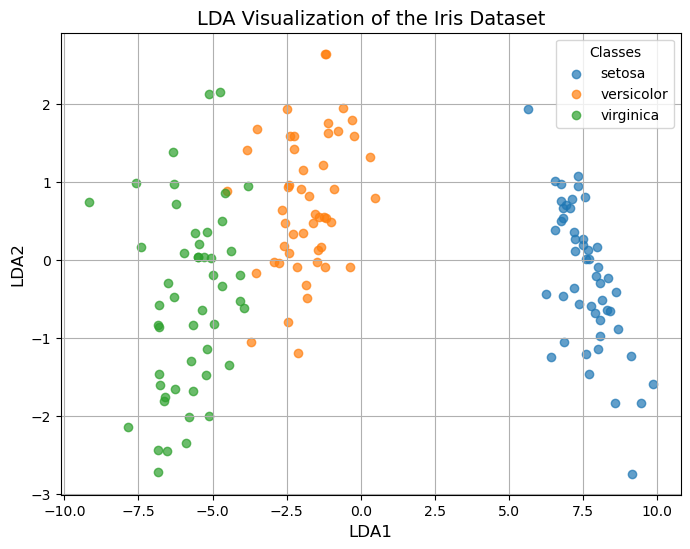

In [70]:
# Plot the LDA results
plt.figure(figsize=(8, 6))
for target in lda_df['Target'].unique():
    subset = lda_df[lda_df['Target'] == target]
    plt.scatter(subset['LDA1'], subset['LDA2'], label=data.target_names[target], alpha=0.7)
plt.title('LDA Visualization of the Iris Dataset', fontsize=14)
plt.xlabel('LDA1', fontsize=12)
plt.ylabel('LDA2', fontsize=12)
plt.legend(title="Classes", fontsize=10)
plt.grid()
plt.show()


___
[Back to the top](#Contents)